# **Downloading the Data**


In [ ]:
import pandas as pd
medical_df= pd.read_csv("insurance.csv")
medical_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
# prompt: Give me a code that describes the dataset

medical_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


The objective is to find a way to estimate the value in the 'charges' column using the values in the other columns.

In [ ]:
medical_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


'age', 'children', 'bmi' and 'charges' are numbers whereas 'sex', 'smoker' and 'region' are strings.


In [ ]:
medical_df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010




*   The age range from 18 years to 64 years with a mean of 39 yrs old.
*   The charges range from 1121.8739 to 63770 with a median of 9382.033 indicating -ve skewness in the dataset.




# **Exploratory Analysis and Visualization**

# Visualize the distribution of values in some columns of the dataset and the relationship between charges and other columns.

In [ ]:
!pip install plotly matplotlib seaborn --quiet

In [ ]:
import plotly.express as px
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

The following settings will improve the default style and font sizes for our charts.

In [ ]:
sns.set_style('darkgrid')
plt.rcParams['font.size']=14
plt.rcParams['figure.figsize']=(10,6)
plt.rcParams['figure.facecolor']='#00000000'

**Age**

Age is a numeric column. The minimum age in the dataset is 18 and the maximum age is 64. Thus, we can visualize the distribution of age using histogram with 47 bins (one for each year and a box plot)



In [ ]:
medical_df.age.describe()

count    1338.000000
mean       39.207025
std        14.049960
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64

In [ ]:
fig=px.histogram(medical_df, x='age', marginal='box', nbins=47,title='Distribution of Age')
fig.update_layout(bargap=0.1)##Use of plotly to plot.
fig.show()

The distribution of ages in the dataset is almost uniform, with 20-30 customers at every age, except for the ages 18 and 19, which seem to have twice as many customers as other ages. The uniform distribution might arise frm the fact that there isn't a big variation in the number of people of any given age(between 18 & 64) in the USA.

*Explain why there are over twice as may customers ages 18 and 19 compared to other ages?*

**Body Mass Index**

In [ ]:
fig = px.histogram(medical_df, x='bmi',marginal='box',color_discrete_sequence=['red'],
                   title='Distribution of BMI (Body Mass Index)')
fig.update_layout(bargap=0.1)
fig.show()

The BMI form a gaussian distribution centered around the value of 30, with a few outliers towards the right.

*Can you explain why the distribution of ages forms a uniform distribution of BMIs forms a gaussian distribution?*

**Charges**

This is the response variable - the annual charges for customers. Use the categorical column 'smoker' to distinguish the charges for smokers and non smokers.

In [ ]:
fig = px.histogram(medical_df,
                   x='charges',
                   marginal='box',
                   color='smoker',
                   color_discrete_sequence=['green','grey'],
                   title='Annual Medical Charges')
fig.update_layout(bargap=0.1)
fig.show()

The following observations can be drawn from the above graph:


*   For most customers,the annual medical charges are under USD10,000. Only a small fraction of customer have higher medical expenses, possibly due to accidents, major illnesses and genetic diseases. The distribution follows a 'power law'.
*   There is a significant difference in medical expense between smokers and non-smokers. While the median for non-smokers is USD7,300, the median for smokers is close to USD35,000.

Exercise: Visualize distribution of medical charges in connection with other factors like 'sex' and 'region'. What do you observe?



**Smoker**

In [ ]:
medical_df.smoker.value_counts()##Return a series containing count of unique values in descending order.

smoker
no     1064
yes     274
Name: count, dtype: int64

In [ ]:
px.histogram(medical_df, x='smoker', color = 'sex', title = 'smoker')

It appears that 20% of customers have reported that they smoke. Can you verify whether this matches the national average, assuming the was collected in 2010? We can also see that smoking appears a more common habit among males. Can you verify this?

*Visualize the distributions of the 'sex', 'region' and 'children' columns and report your observations.

**Age and Charges**

Use a scatterplot where each point represent one customer. We also use values in the 'smoker' column to color the points.

In [ ]:
fig=px.scatter(medical_df,
               x='age',
               y='charges',
               color='smoker',
               opacity=0.8,
               hover_data=['sex'],
               title= 'Age vs. charges')
fig.update_traces(marker_size=5)
fig.show()

We can make the following observations from the above chart:


*   The general trend seems to be that medical charges increase with age, as we might expect. However, there is significant variation at every age, and it's clear that age alone cannot be usd to accurately detrmine medical charges.
*   We can see three 'clusters' of points each of which seems to form a line with an increasing slope:
  *   The first and the largest cluster consists primarily of presumably "healthy non-smokers" who have relatively low medical charges compared to others.
  *   The second cluster contains a mix of smokers and non-smokers. It's possible that these are actually two distinct overlapping clusters: "non-smokers with medical issues" and "smokers without major medical issues".
  *   The final cluster consists exclusively of smokers, presumably smokers with major medical issues that are possibly related to or worsened by smoking.

  *What are other inference that can be drawn from the chart?*









**BMI and Charges**

In [ ]:
fig=px.scatter(medical_df,
               x='bmi',
               y='charges',
               color='smoker',
               opacity=0.8,
               hover_data=['sex'],
                           title='BMI vs Charges')
fig.update_traces(marker_size=5)
fig.show()

It appears that for non-smokers, an increase in BMI doesn't seem to be related to an increase in medical charges. However medical charges tend to be significantly higher for smokers with a BMI >30.

*What other insights can you gather from the above graph?*

*Create more grapghs to visualize how the "charges" column is related to other columns ("children", "sex", "region" and "smoker"). Summarize the nsight sgathered from these graphs.*

**Use violin plots(px.violin) and bar plots (sns.barplot)**


In [ ]:
px.violin(medical_df, x='children', y='charges')#Used to plot discrete data .i.e count

The charges tend to slightly increase with the increase in the number of children.

#  **Correlation**

In [ ]:
medical_df.charges.corr(medical_df.age)

0.2990081933306476

In [ ]:
medical_df.charges.corr(medical_df.bmi)

0.19834096883362895

In [ ]:
medical_df.charges.corr(medical_df.children)

0.06799822684790478

To compute correlation for categorical columns, they must first be converted in to numeric columns.

In [ ]:
smoker_values = {'no':0, 'yes':1}
gender_values = {'male':0 ,'female':1}
medical_df['smoker'] = medical_df.smoker.map(smoker_values)
medical_df['sex']=medical_df.sex.map(gender_values)

In [ ]:
medical_df.charges.corr(medical_df.smoker)

0.787251430498478

Correlation measures both strength and direction: Perfect positive correlation, Strong positive correlation, Weak positive correlation. Perfect negative correlation, Strong negative  correlation, Weak negative correlation. or no correlation.

In [ ]:
numerical_cols=['age','bmi','children','charges']
medical_df[numerical_cols].corr()

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


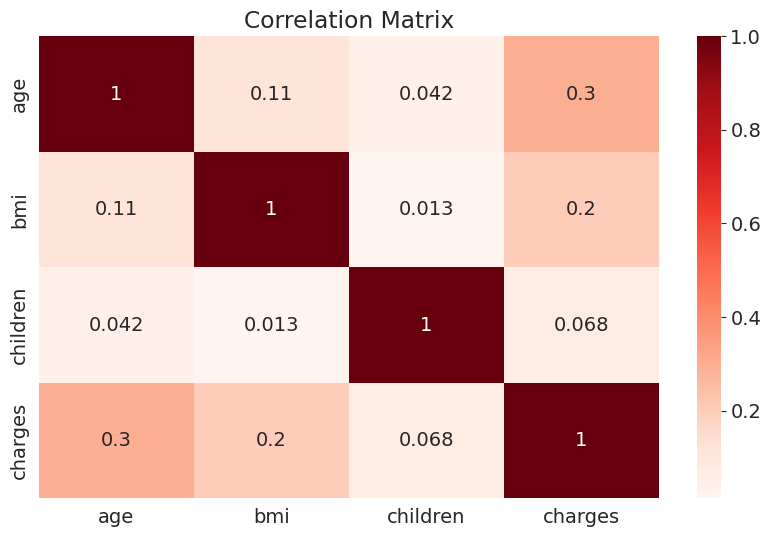

In [ ]:
sns.heatmap(medical_df[numerical_cols].corr(),cmap='Reds',annot=True)
plt.title('Correlation Matrix');

*Correlation vs Causation fallacy*

# **Linear Regression using a Single Feature**

Because `smoker` and `age` columns have the strongest correlation with `charges`. We estimate the value of charges using the value of age for non-smokers.

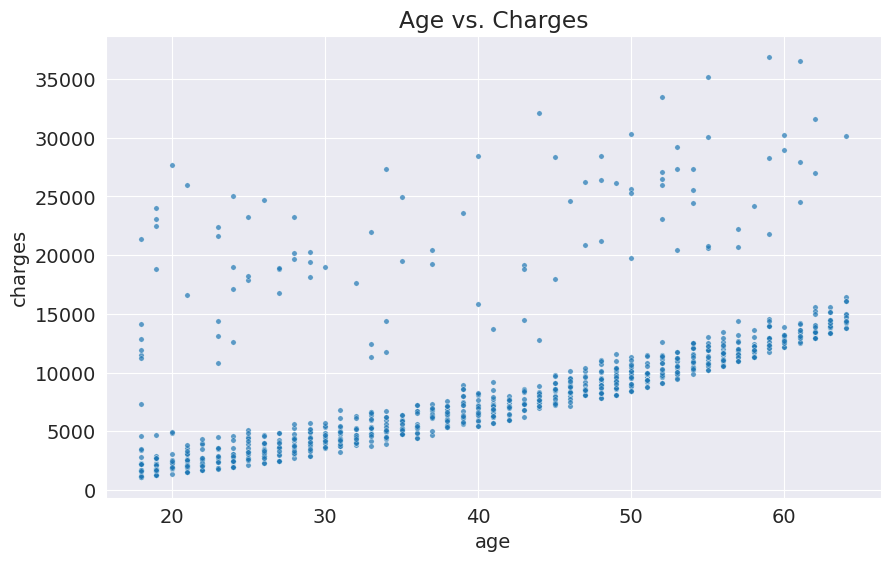

In [ ]:
non_smoker_df=medical_df[medical_df.smoker==0]
plt.title('Age vs. Charges')
sns.scatterplot(data=non_smoker_df, x='age', y='charges', alpha=0.7, s=15);

**Create an helper Function to act as first model**

In [ ]:
def estimate_charges(age, w, b):
  return w*age + b

Guess the values of parameters/weights .i.e

In [ ]:
w=50
b=100
ages=non_smoker_df.age
estimated_charges=estimate_charges(ages,w,b)
estimated_charges

1       1000
2       1500
3       1750
4       1700
5       1650
        ... 
1332    2700
1333    2600
1334    1000
1335    1000
1336    1150
Name: age, Length: 1064, dtype: int64

In [ ]:
non_smoker_df.charges

1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
5        3756.62160
           ...     
1332    11411.68500
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
Name: charges, Length: 1064, dtype: float64

Plot the estimated charges using a line graph

Text(0, 0.5, 'Estimated Charges')

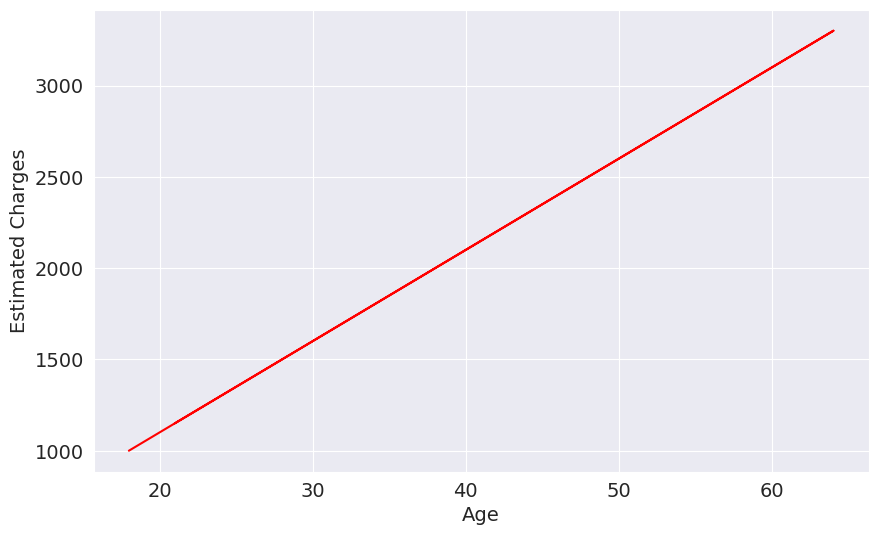

In [ ]:
plt.plot(ages, estimated_charges, 'r-');
plt.xlabel('Age');
plt.ylabel('Estimated Charges')

We can over this line on the actual data to see how well the model fits the data.

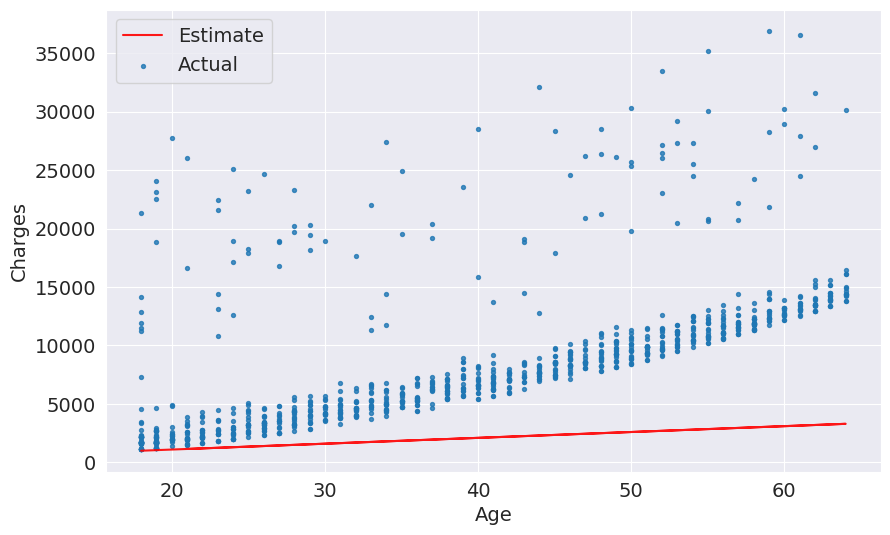

In [ ]:
target= non_smoker_df.charges
plt.plot(ages, estimated_charges, 'r', alpha=0.9);

plt.scatter(ages, target, s=8, alpha=0.8);
plt.xlabel('Age');
plt.ylabel('Charges');
plt.legend(['Estimate','Actual'])




The estimates are poor and the line does not fit the data. Try diffrent values of w and b to move the line around. Define a helper function try_parameters which takes w and b as inputs and creates the above plot.

In [ ]:
def try_parameters(w, b):
  ages=non_smoker_df.age
  target=non_smoker_df.charges
  estimated_charges =estimate_charges(ages,w, b)
  plt.plot(ages, estimated_charges, 'r', alpha=0.9);
  plt.scatter(ages, target, s=8, alpha=0.8);
  plt.xlabel('Age');
  plt.ylabel('Charges');
  plt.legend(['Estimate','Actual']);




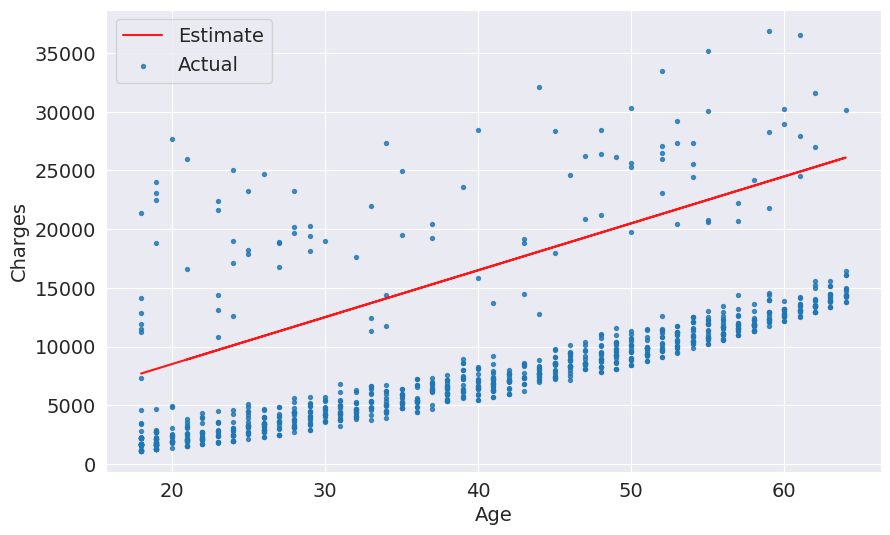

In [ ]:
try_parameters(400,500)

In [ ]:
targets=non_smoker_df.charges
targets

1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
5        3756.62160
           ...     
1332    11411.68500
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
Name: charges, Length: 1064, dtype: float64

In [ ]:
predictions= estimated_charges
predictions

1       1000
2       1500
3       1750
4       1700
5       1650
        ... 
1332    2700
1333    2600
1334    1000
1335    1000
1336    1150
Name: age, Length: 1064, dtype: int64

**Loss/Cost Function**
We compare our model's predictions with the actual targets using the following method:


*   Calculate the difference between the targets and predictions (the diffrence is called the "residual")
*   Square all the elements of the difference matrix to remove negahtive values.
*   Calculate the average of the elements in the resulting matrix.
*   Take the square root of the result.

The RMSE implies that on average how far are we from the line.The average of the difference between predicted and expected values.





Let's define a function to compute RMSE

In [ ]:
import numpy as np
def rmse(targets, predictions):
  return np.sqrt(np.mean(np.square(targets-predictions)))

Let's compute the RMSE for our model with a sample set of weights

In [ ]:
w=50
b=100

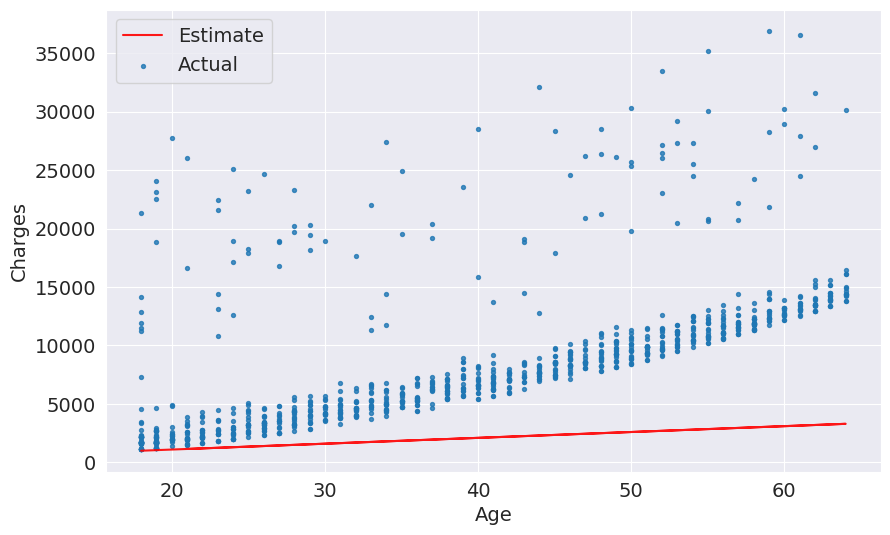

In [ ]:
try_parameters(w,b)

In [ ]:
targets=non_smoker_df['charges']
predicted=estimate_charges(non_smoker_df.age, w,b)
rmse(targets, predicted)

8461.949562575493

*  On average, each element in the prediction differs from the actual target by $8461.
*  **The result is called the loss beacuse it indicates how bad the model is at predicting the target. It represent information loss in the model,: the lower the loss the better the model.**

Lets modify the try_parameters functions to also display the loss.

In [ ]:
def try_parameters(w,b):
    ages=non_smoker_df.age
    target = non_smoker_df.charges
    predictions= estimate_charges(ages,w,b)

    plt.plot(ages, predictions, 'r', alpha=0.9);
    plt.scatter(ages, target, s=8, alpha=0.8);
    plt.xlabel('Age');
    plt.ylabel('Charges')
    plt.legend(['Prediction', 'Actual']);

    loss=rmse(target, predictions)
    print("RMSE Loss: ", loss)



RMSE Loss:  4991.993804156943


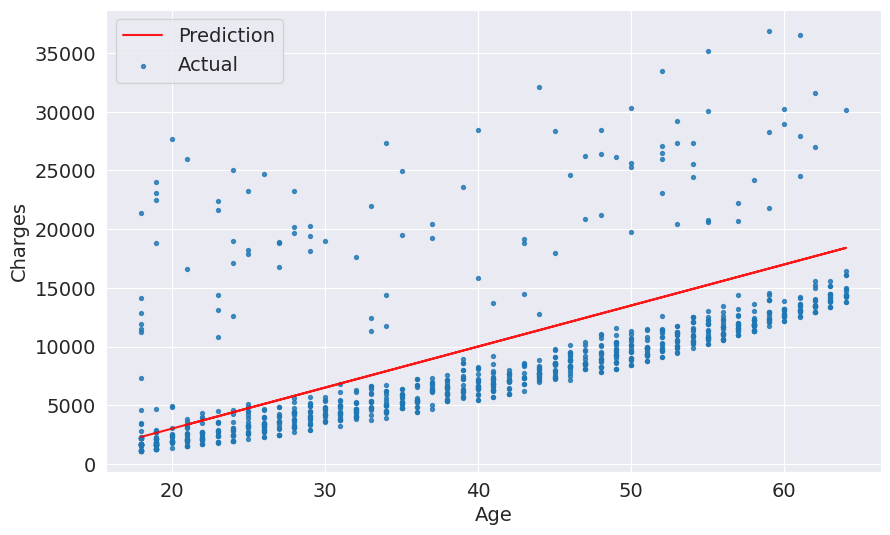

In [ ]:
try_parameters(350,-4000)

**Exercise:** Try different values of *w* and *b* to minimize the *RMSE* loss. What is the lower value of loss you able to achieve? Can you come with a general strategy for finding better values of *w* and *b* by trial and error?

##**Optimizer**

We need a strategy to modify weights *w* and *b* to reduce the loss and improve the fit of the line to the data.
Both Ordinary Least Squares and Stochastic gradient descent minimises the loss. While Ordinary Least squares directly computes the best values for *w* and *b* using matrix operations, while gradient descent uses a iterative approach, starting with a random values of *w* and *b* and slowly improving them using derivatives.

##**Linear Regression using Scikit-Learn**##

In practice, you will never need to implement either of the above methods. You can instead used the library **scikit-learn**.

In [ ]:
##!pip install scikit-learn --quiet

Let's use the `LinearRegression` class from `scikit-learn` to find the best fit line for "age" vs "charges" using the ordinary least squares optimization technique.

In [ ]:
from sklearn.linear_model import LinearRegression

First, we create a new model object.

In [ ]:
model = LinearRegression()

Next, we can use the `fit` method of the model to find the best fit line for the inputs and the targets.

In [ ]:
help(model.fit)

Help on method fit in module sklearn.linear_model._base:

fit(X, y, sample_weight=None) method of sklearn.linear_model._base.LinearRegression instance
    Fit linear model.
    
    Parameters
    ----------
    X : {array-like, sparse matrix} of shape (n_samples, n_features)
        Training data.
    
    y : array-like of shape (n_samples,) or (n_samples, n_targets)
        Target values. Will be cast to X's dtype if necessary.
    
    sample_weight : array-like of shape (n_samples,), default=None
        Individual weights for each sample.
    
        .. versionadded:: 0.17
           parameter *sample_weight* support to LinearRegression.
    
    Returns
    -------
    self : object
        Fitted Estimator.



Note that the input `x` must be a 2-d array, so we'll need to pass a dataframe, instead of a single column.

In [ ]:
import numpy as np
inputs = non_smoker_df [['age']]
targets=non_smoker_df.charges
#inputs=inputs.values.reshape(-1,1)

print('input.shape:',inputs.shape)
print('targets.shape:',targets.shape)

input.shape: (1064, 1)
targets.shape: (1064,)


Let's fit the model to the data

In [ ]:
model.fit(inputs,targets)

LinearRegression()

We can now make prediction using the model. Let's try predicting the charges for ages 23,37 and 61.

In [ ]:
model.predict(np.array(([23],[37],[61])))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



array([ 4055.30443855,  7796.78921819, 14210.76312614])

Do these values seem reasonable? Compare them with the scatter plot above.
Let compute the predictions for the entire set of inputs

In [ ]:
predictions=model.predict(inputs)

In [ ]:
predictions

array([2719.0598744 , 5391.54900271, 6727.79356686, ..., 2719.0598744 ,
       2719.0598744 , 3520.80661289])

Let's compute the RMSE loss to evaluate the model.

In [ ]:
rmse(targets, predictions)

4662.505766636395

Seems like our prediction is off by $4000 on average, which is not bad considering the fact that there are several outliers.

The parameters of the model are stored in `coef` and `intercept` properties

In [ ]:
#w
print('Model Coeffiecent:',model.coef_)
#b
print('Model Intercept:',model.intercept_)

Model Coeffiecent: [267.24891283]
Model Intercept: -2091.4205565650864


Are these parameters close to your best guesses?

Let's visualize the line created by the above parameters.

RMSE Loss:  4662.505766636395


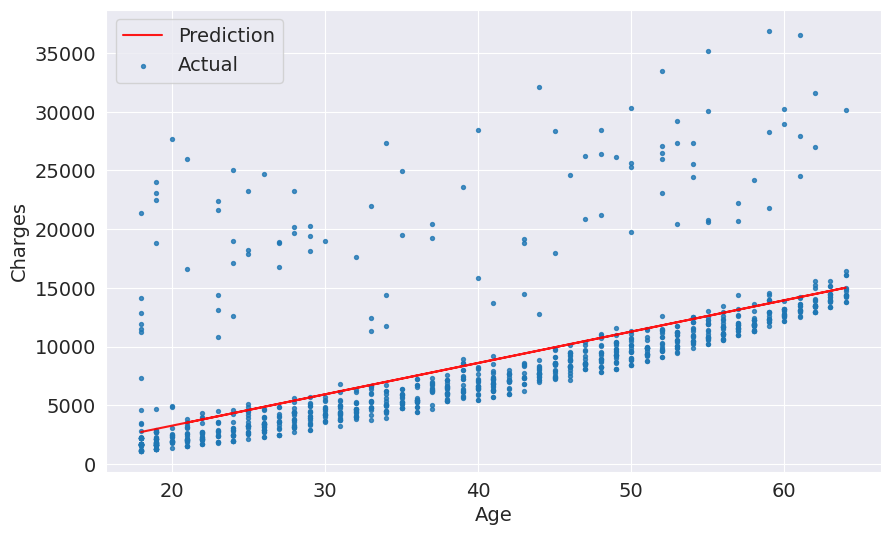

In [ ]:
try_parameters(model.coef_, model.intercept_)

Indeed the line is quite close to the points. It is slightly above the cluster of points, because it's also trying to account for outliers.
>**Exercise**: *Use `SGDRegressor` class from `scikit-learn` to train a model using the stochastic gradient descent technique. Make predictions and compute the loss? Do you see any difference in the results.*


##**Machine Learning**

This is the process of computing the best parameters to model the relationship between some feature and targets.

Every Machine Learning problem has 3 components:


*   **Model**
*   **Cost Function**
*   **Optimizer**

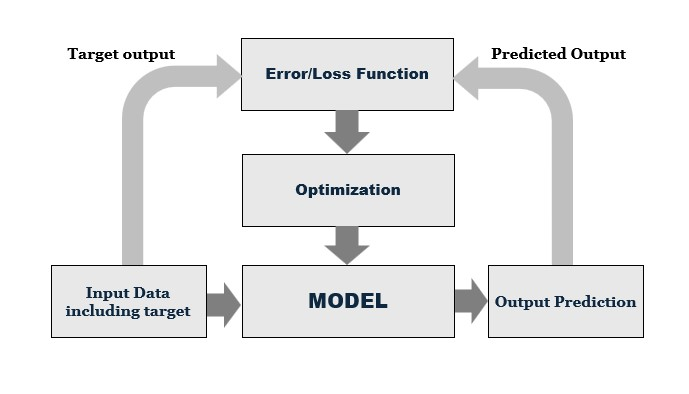

**To train an ML algorithm using `Scikit-Learn`, the following general procedures are applied:**

In [ ]:
#Create inputs and targets
inputs, targets = non_smoker_df[['age']], non_smoker_df['charges']

#Create and train the model
model = LinearRegression().fit(inputs, targets)

#Generate predictions
predictions = model.predict(inputs)

#Compute loss to evaluate the model
loss=rmse(targets, predictions)
print('Loss:', loss)

Loss: 4662.505766636395


# **Linear Regression using Multiple Features**

*Charges=w1*age+w2*bmi+b*

In [ ]:
#create inputs and targets
inputs, targets=non_smoker_df[['age','bmi']],non_smoker_df[['charges']]

#Create and train the model
model= LinearRegression().fit(inputs, targets)

#Generate predictions
predictions =model.predict(inputs)

#Compute loss to evaluate the model
loss=rmse(targets, predictions)
print('loss:', loss)

loss: 4662.3128354612945


Adding `BMI` doesn't reduce the loss by much, as the `BMI` has a very weak correlation with `charges`, especially for non smokers.

In [ ]:
non_smoker_df.charges.corr(non_smoker_df.bmi)

0.0840365431283327

In [ ]:
fig=px.scatter(non_smoker_df, x='bmi', y='charges', title='BMI vs charges')
fig.update_traces(marker_size = 5)
fig.show()

Its harder to interpret a 3D scatter plot compared to a 2D scatter pplot. As ewe add more features, it becomes impossible to visualize all features at once, which is why we use measures like correlation and loss.

Let's check the parameters of the model

In [ ]:
model.coef_, model.intercept_

(array([[266.87657817,   7.07547666]]), array([-2293.63209065]))

Clearly, `BMI` has a much lower weightage, and you can see why. It has a tiny ontribution, and even that is probably accidental. This is an important thing to keep in mind: you can't find a relationship that doesn't exist, no matter what machine learning technique or optimization algorithm you apply.

> **EXERCISE:** *Train a linear regression model to estimate `charges` using `BMI`alone. Do you expect it to be better or worse than the previoiusly trained models?*

**Let's add the final column `children` which seems to have some correlation with `charges`**

charges=w1*age+w2*bmi+w3*charges+b

In [ ]:
non_smoker_df.charges.corr(non_smoker_df.children)

0.13892870453542192

In [ ]:
#strip plot
fig=px.strip(non_smoker_df, x='children',y='charges', title="Children vs charges")
fig.update_traces(marker_size=4, marker_opacity=0.7)
fig.show()

In [ ]:
#Create inputs and targets
inputs, targets = non_smoker_df[['age', 'bmi', 'children']], non_smoker_df[['charges']]

#Create and train the model
model=LinearRegression().fit(inputs,targets)

#Generate predictions
predictions=model.predict(inputs)

#compute loss to evaluate the model
loss=rmse(targets, predictions)
print('Loss:',loss)


Loss: 4608.470405038247


Their is no big reduction in the loss, even though it's greater than in the case of `BMI`

>**EXERCISE:** Repeat the steps in this section to train a linear regression model to estimate medical charges for smokers.  Visualize the targets and predictions, and compute the loss.

>**EXERCISE:** Repeat the steps in this section to train a linear regression model to estimate medical charges for all customers. Visualize the targets and predictions, and compute the loss. Is the loss lower or higher?


In [ ]:
#Create inputs and targets
inputs, targets=medical_df[['age','bmi','children']], medical_df['charges']

#Create and train the model
model=LinearRegression().fit(inputs,targets)

#Generate predictions
predictions=model.predict(inputs)

#Compute loss to evaluate the model
loss=rmse(targets, predictions)
print('Loss:',loss)

Loss: 11355.317901125973


In [ ]:
px.scatter(medical_df, x='age', y='charges', color= 'smoker')

##**Using Categorical Features for Machile Learning**

To use categorical columns, we convert them to numbers. There are these three common techniques for doing this:


1.   If a categorical column has just two categories(it's called a binary category), then we can replace their values with 0 and 1.
2.   If a categorical column has more than 2 categories, we can perform one-hot encoding .i.e. create a new column for each category with 1s and 0s.
3.   If the categories have a natural order(e.g. cold, neutral, warm, hot), then they can be converted to numbers (e.g. 1, 2, 3, 4) preserving the order. These are called ordinals



###**Binary Categories**

The `smoker` category has just two values `yes` and `no`. Let's create a new column `smoker_code` containing 0 for "no" and 1 for "yes".

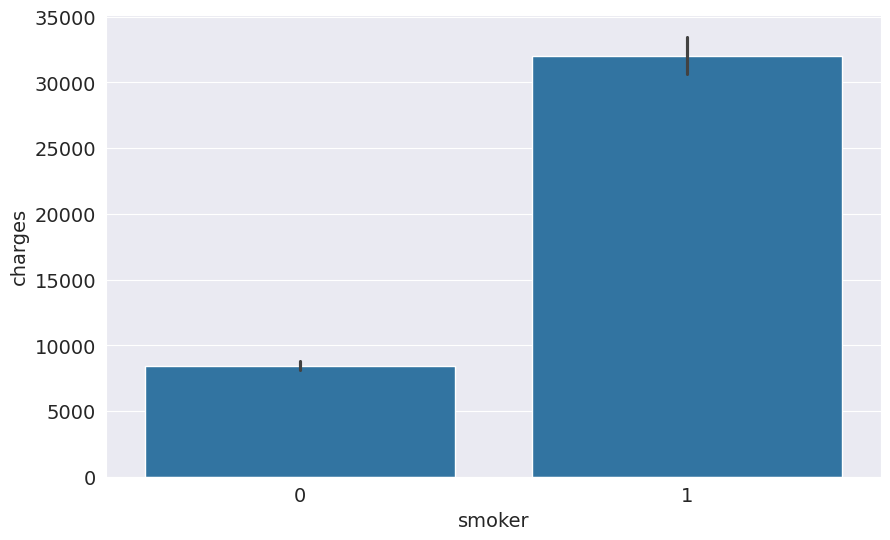

In [ ]:
sns.barplot(data=medical_df, x='smoker', y= 'charges');

In [ ]:
smoker_codes={'no':0,'yes':1}
medical_df['smoker_code']=medical_df.smoker.map(smoker_codes)

In [ ]:
medical_df.charges.corr(medical_df.smoker_code)

0.787251430498478

In [ ]:
medical_df

,age,sex,bmi,children,smoker,region,charges,smoker_code
0,19,female,27.900,0,yes,southwest,16884.92400,1
1,18,male,33.770,1,no,southeast,1725.55230,0
2,28,male,33.000,3,no,southeast,4449.46200,0
3,33,male,22.705,0,no,northwest,21984.47061,0
4,32,male,28.880,0,no,northwest,3866.85520,0
...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,0
1334,18,female,31.920,0,no,northeast,2205.98080,0
1335,18,female,36.850,0,no,southeast,1629.83350,0
1336,21,female,25.800,0,no,southwest,2007.94500,0


We can now use the `smoker_code` column for linear regression.

charges = w1age+w2*bmi+w3*charges+w4*smoker+b

In [ ]:
#Create inputs and targets
inputs, targets = medical_df[['age','bmi','children','smoker_code']], medical_df[['charges']]

#Create and train the model
model=LinearRegression().fit(inputs, targets)

#Generate predictions
predictions = model.predict(inputs)

#compute loss to evaluate the model
loss=rmse(targets, predictions)
print('Loss:', loss)

Loss: 6056.439217188081


The loss reduces from `11355` to `6056`, almost by `50%`!. This is an important lesson: never ignore categorical data.

Let's try adding the `sex` as well.


charges = w1*age+w2*bmi+w3*charges+w4*smoker+w5*sex+b

<Axes: xlabel='sex', ylabel='charges'>

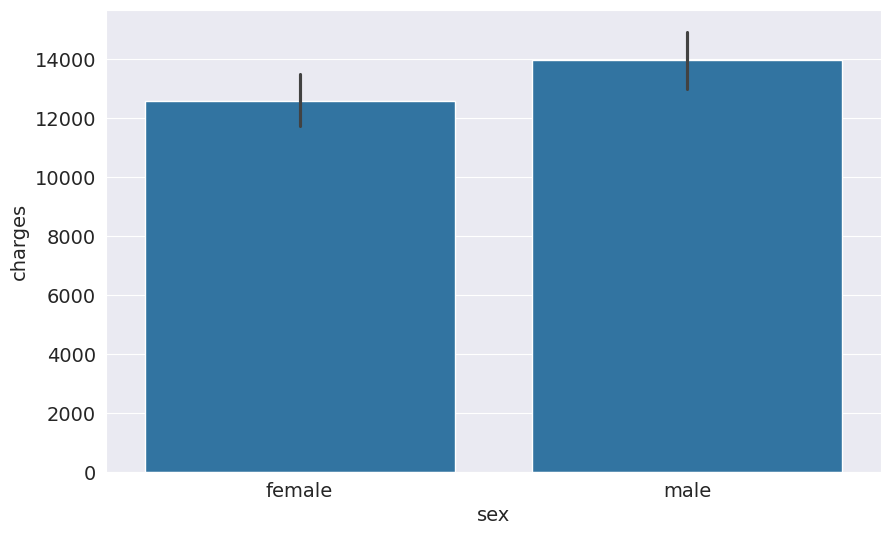

In [ ]:
sns.barplot(data= medical_df, x='sex', y='charges')

In [ ]:
sex_codes = {'female':0, 'male':1}

In [ ]:
medical_df['sex_code']=medical_df.sex.map(sex_codes)

In [ ]:
medical_df.charges.corr(medical_df.sex_code)

0.057292062202025484

In [ ]:
medical_df

,age,sex,bmi,children,smoker,region,charges,smoker_code,sex_code
0,19,female,27.900,0,yes,southwest,16884.92400,1,0
1,18,male,33.770,1,no,southeast,1725.55230,0,1
2,28,male,33.000,3,no,southeast,4449.46200,0,1
3,33,male,22.705,0,no,northwest,21984.47061,0,1
4,32,male,28.880,0,no,northwest,3866.85520,0,1
...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,0,1
1334,18,female,31.920,0,no,northeast,2205.98080,0,0
1335,18,female,36.850,0,no,southeast,1629.83350,0,0
1336,21,female,25.800,0,no,southwest,2007.94500,0,0


In [ ]:
#Create inputs and targets
inputs, targets = medical_df[['age', 'bmi', 'children','smoker_code', 'sex_code']], medical_df[['charges']]

#Create and train the model
model = LinearRegression().fit(inputs, targets)

#Generate predictions
predictions= model.predict(inputs)

#Compute loss to evaluate the model
loss=rmse(targets, predictions)
print('Loss:', loss)

Loss: 6056.100708754546


*This is does have asignificant impact on the Loss hence the sex column can be ignored*

##**One-hot Encoding**

The `region` column contains 4 values, so we use one-hot encoding and create a new column for each region.

<Axes: xlabel='region', ylabel='charges'>

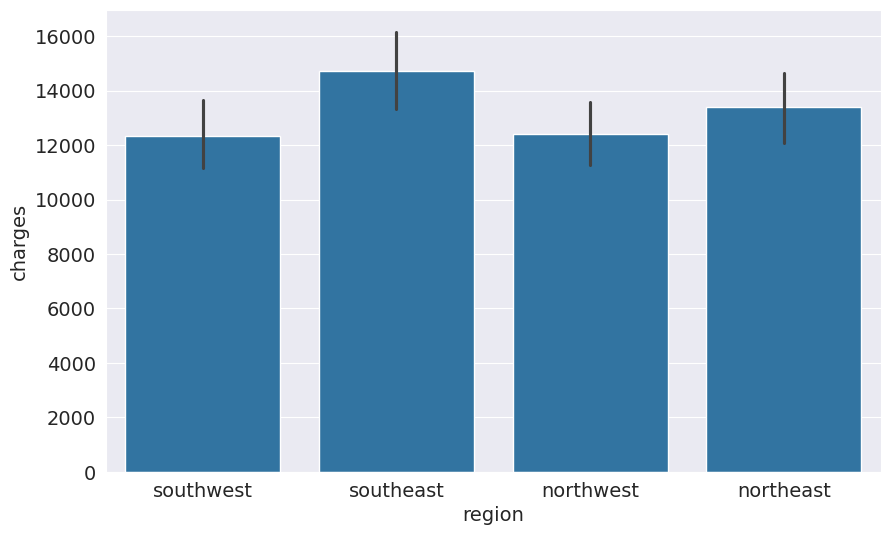

In [ ]:
sns.barplot(data=medical_df, x='region', y='charges')

In [ ]:
from sklearn import preprocessing
enc = preprocessing.OneHotEncoder()
enc.fit(medical_df[['region']])
enc.categories_

[array(['northeast', 'northwest', 'southeast', 'southwest'], dtype=object)]

In [ ]:
one_hot =enc.transform(medical_df[['region']]).toarray()
one_hot

array([[0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       ...,
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.]])

In [ ]:
medical_df[['northeast', 'northwest', 'southeast', 'southwest']]=one_hot

In [ ]:
medical_df

,age,sex,bmi,children,smoker,region,charges,smoker_code,sex_code,northeast,northwest,southeast,southwest
0,19,female,27.900,0,yes,southwest,16884.92400,1,0,0.0,0.0,0.0,1.0
1,18,male,33.770,1,no,southeast,1725.55230,0,1,0.0,0.0,1.0,0.0
2,28,male,33.000,3,no,southeast,4449.46200,0,1,0.0,0.0,1.0,0.0
3,33,male,22.705,0,no,northwest,21984.47061,0,1,0.0,1.0,0.0,0.0
4,32,male,28.880,0,no,northwest,3866.85520,0,1,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,0,1,0.0,1.0,0.0,0.0
1334,18,female,31.920,0,no,northeast,2205.98080,0,0,1.0,0.0,0.0,0.0
1335,18,female,36.850,0,no,southeast,1629.83350,0,0,0.0,0.0,1.0,0.0
1336,21,female,25.800,0,no,southwest,2007.94500,0,0,0.0,0.0,0.0,1.0


**Let's include the region columns in to  our model**

charges = w1*age+w2*bmi+w3*charges+w4*smoker+w5*sex+w6*region+b

In [ ]:
#Create inpus and targets
input_cols=['age', 'bmi', 'children','smoker_code', 'sex_code','northeast', 'northwest', 'southeast', 'southwest']
inputs, targets = medical_df[input_cols],medical_df[['charges']]

#Create and train the model
model = LinearRegression().fit(inputs, targets)

#Generate predictions
predictions = model.predict(inputs)

#Compute loss to evaluate the model
loss=rmse(targets, predictions)
print('Loss:', loss)


Loss: 6041.6796511744515


This leads to a fairly small reduction in the loss.

> **EXERCISE:** Are two separate linear regression models, one for smokers and one of non-smokers, better than a single linear regression model? why or why not? Try it out and see if you can justify your answer with data.

In [ ]:
medical_df[input_cols].loc[10]

age            25.00
bmi            26.22
children        0.00
smoker_code     0.00
sex_code        1.00
northeast       1.00
northwest       0.00
southeast       0.00
southwest       0.00
Name: 10, dtype: float64

In [ ]:
model.predict([[28,30,2,1,0,0,1,0,0]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



array([[29875.81463599]])

##**Model Improvements**

**Feature Scaling**

Due to regulatory requirements, we need to explain the rationale behind the predictions  of the model.

charges = w1*age+w2*bmi+w3*charges+w4*smoker+w5*sex+w6*region+b

To compare the importance of each featurein the model, we first compare their weights

In [ ]:
model.coef_

array([[  256.85635254,   339.19345361,   475.50054515, 23848.53454191,
         -131.3143594 ,   587.00923503,   234.0453356 ,  -448.01281436,
         -373.04175627]])

In [ ]:
model.intercept_

array([-12525.5478112])

In [ ]:
weights_df=pd.DataFrame({'feature': np.append(input_cols, 1),
                         'weight': np.append(model.coef_, model.intercept_)})
weights_df

,feature,weight
0,age,256.856353
1,bmi,339.193454
2,children,475.500545
3,smoker_code,23848.534542
4,sex_code,-131.314359
5,northeast,587.009235
6,northwest,234.045336
7,southeast,-448.012814
8,southwest,-373.041756
9,1,-12525.547811


<Axes: xlabel='feature'>

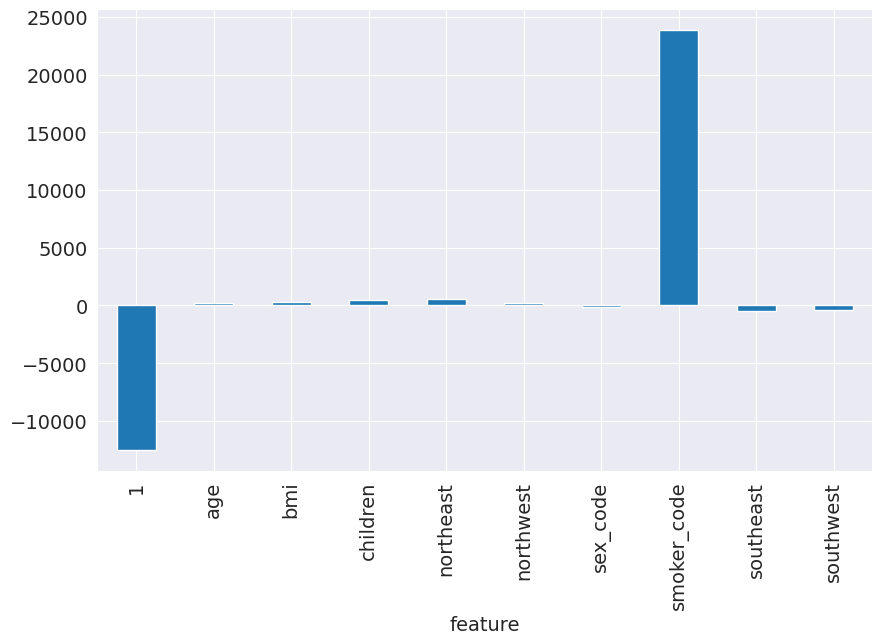

In [ ]:
# @title Weight by Feature

weights_df.groupby('feature')['weight'].mean().plot(kind='bar')

While it seems like `BMI` and the `northeast` have a higher weight than `age`, keep in mind that the range of values for `BMI` is limited (15 to 40) and the `northeast` column only takes the values 0 and 1.

Because different columns have different ranges, we run in to two issues:


1.   We can't compare the weights of different column to identify which features are important
2.   A column with a larger range of inputs may disproportionately affect the loss and dominate the optimization process.

For this reason, it's common practice to scale (or standardize) the values in numeric column by substracting the mean and dividing the standard deviation.




##**Standardization**

We standardize the numeric columns using the `StandardScaler` class from `scikit_learn` library so that the values are centered around zero .i.e normal distribution with a mean of zero and standard devaition of 1.

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
numeric_cols = ['age','bmi','children']
scaler=StandardScaler()
scaler.fit(medical_df[numeric_cols])

StandardScaler()

In [ ]:
scaler.mean_

array([39.20702541, 30.66339686,  1.09491779])

In [ ]:
scaler.var_

array([197.25385199,  37.16008997,   1.45212664])

**We can now scale the data**

In [ ]:
medical_df[numeric_cols]

,age,bmi,children
0,19,27.900,0
1,18,33.770,1
2,28,33.000,3
3,33,22.705,0
4,32,28.880,0
...,...,...,...
1333,50,30.970,3
1334,18,31.920,0
1335,18,36.850,0
1336,21,25.800,0


In [ ]:
scaled_inputs = scaler.transform(medical_df[numeric_cols])
scaled_inputs

array([[-1.43876426, -0.45332   , -0.90861367],
       [-1.50996545,  0.5096211 , -0.07876719],
       [-0.79795355,  0.38330685,  1.58092576],
       ...,
       [-1.50996545,  1.0148781 , -0.90861367],
       [-1.29636188, -0.79781341, -0.90861367],
       [ 1.55168573, -0.26138796, -0.90861367]])

These can now be be combined with categorical data

In [ ]:
cat_cols=['smoker_code', 'sex_code', 'northeast', 'northwest', 'southeast','southwest' ]
categorical_data=medical_df[cat_cols].values


In [ ]:
inputs=np.concatenate((scaled_inputs, categorical_data), axis=1)
targets=medical_df.charges

#create and train the model
model=LinearRegression().fit(inputs, targets)

#Generate predictions
predictions = model.predict(inputs)

#Compute loss to evaluate the model
loss = rmse(targets, predictions)
print('Loss:' , loss)

Loss: 6041.6796511744515


**We can now compare the weights in formula**

 w1*age+w2*bmi+w3*charges+w4*smoker+w5*sex+w6*region+b


In [ ]:
weight_df= pd.DataFrame({
    'feature': np.append(numeric_cols+cat_cols, 1),
    'weight':np.append(model.coef_, model.intercept_)
})
weight_df.sort_values('weight', ascending = False)

,feature,weight
3,smoker_code,23848.534542
9,1,8466.483215
0,age,3607.472736
1,bmi,2067.691966
5,northeast,587.009235
2,children,572.998210
6,northwest,234.045336
4,sex_code,-131.314359
8,southwest,-373.041756
7,southeast,-448.012814


As you can see, the most important features are:


1.  Smoker
2.   Age
3.   BMI



In [ ]:
new_customers = [[28, 30, 2, 1,0,0,1,0,0.]]

In [ ]:
scaler.transform([[28,30,2]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



array([[-0.79795355, -0.10882659,  0.75107928]])

In [ ]:
model.predict([[-0.79795355, -0.10882659,  0.75107928,1,0,0,1,0,0.]])

array([29875.81463371])

##**Creating a Test Set**

Models like the one we've created are designed to be used in the real world. It's common practice to set aside a small fraction of the data (e.g 10%) just for testing and reporting results of the model.

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
inputs_train, inputs_test, targets_train, targets_test = train_test_split(inputs, targets, test_size=0.1)

In [ ]:
#Create and train the model
model  = LinearRegression().fit(inputs_train, targets_train)

#Generate predictions
predictions_test=model.predict(inputs_test)

#Compute loss to evaluate the model
loss=rmse(targets_test, predictions_test)
print('Test Loss:',loss)

Test Loss: 5576.067710358495


Let's compare with the training loss.

In [ ]:
#Generate predictions
predictions_train=model.predict(inputs_train)

#Compute loss to evaluate the model
loss=rmse(targets_train, predictions_train)
print('Test Loss:',loss)

Test Loss: 6158.208148661888


Can you explain why the training loss is lower than the test loss?
**The loss on the test set is always higher than the loss on the training set because

# **How  to Approach a Machine Learning Problem**

1.   Explore the data and find correlations between inputs and targets
1.   Pick the right model, loss functions and optimizer for the problem at hand.
2.   Scale numeric variables and one-hot encode categorical data.
2.   Set aside a test set(using a fraction of the training set)
5.   Train the model
6.  Make predictions on the test set and compute the loss


